In [1]:
%pwd

'C:\\Users\\sc522\\PROJECTS\\STAT\\IS5\\code\\ch09'

In [2]:
import numpy as np
import pandas as pd
import matplotlib
# %matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
datafile = '../../dataset/ch09/bodyfat.txt'
bodyfat = pd.read_csv(datafile, sep='\t')

In [4]:
bodyfat.head()

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Simple Regression: % Body Fat ~ Waist Size

In [5]:
y = bodyfat['Pct.BF']

In [6]:
x = bodyfat['Waist']

In [7]:
linmod = LinearRegression()

In [8]:
x = np.array(x).reshape(-1, 1)
linmod.fit(x, y);
y_hat = linmod.predict(x)
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 67.8%


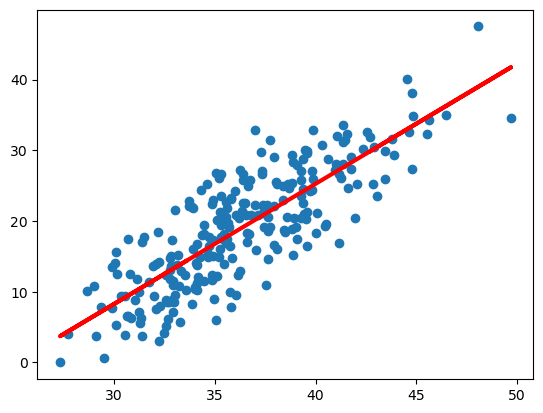

In [9]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_hat, color='r', lw=3);

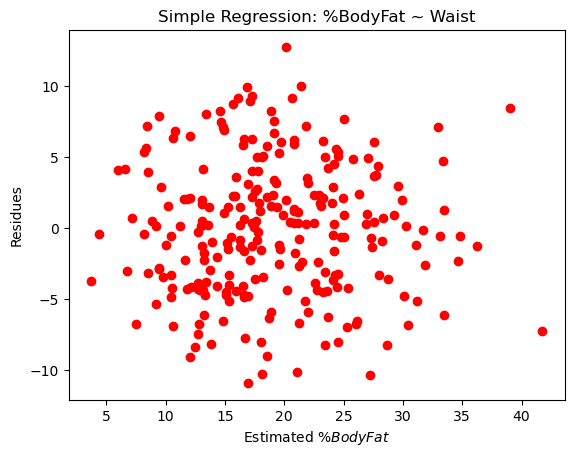

In [10]:
residues = y - y_hat
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Estimated %$BodyFat$')
plt.ylabel('Residues')
plt.title('Simple Regression: %BodyFat ~ Waist');

### Multiple Regression:  % Body Fat ~ (Waist Size, Height)

In [11]:
x = bodyfat[['Waist', 'Height']]

In [12]:
linmod.fit(x, y);
y_hat = linmod.predict(x)
residues = y - y_hat
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 71.3%


In [13]:
print(f'Waist coef: {linmod.coef_[0]:.4f}')
print(f'Height coef: {linmod.coef_[1]:.4f}')

Waist coef: 1.7731
Height coef: -0.6015


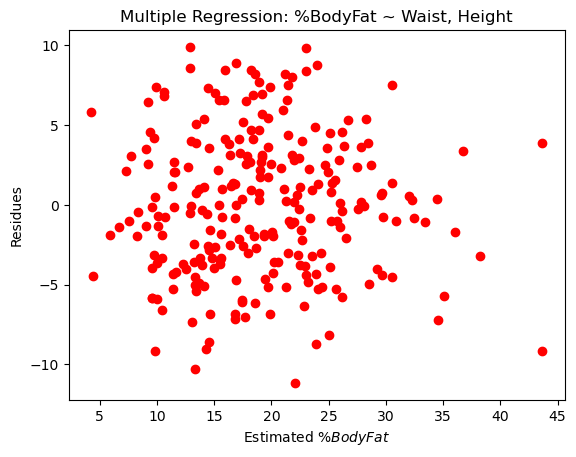

In [14]:
plt.figure()
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Estimated %$BodyFat$')
plt.ylabel('Residues')
plt.title('Multiple Regression: %BodyFat ~ Waist, Height');

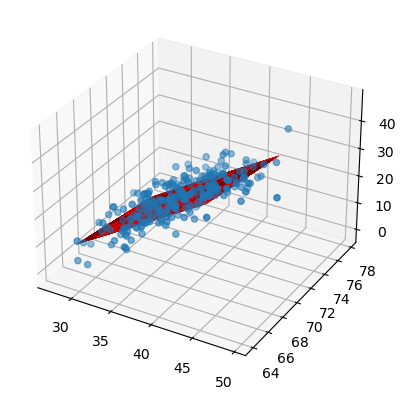

In [15]:
x1 = np.array(bodyfat['Waist'])
x2 = np.array(bodyfat['Height'])
X1, X2 = np.meshgrid(x1, x2)
x1_bar = x1.mean()
x2_bar = x2.mean()
y_bar = y.mean()
fitted = linmod.coef_[0] * (X1-x1_bar) + linmod.coef_[1] * (X2 - x2_bar) + y_bar
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, np.array(y));
ax.plot_surface(X1, X2, fitted, color='r');

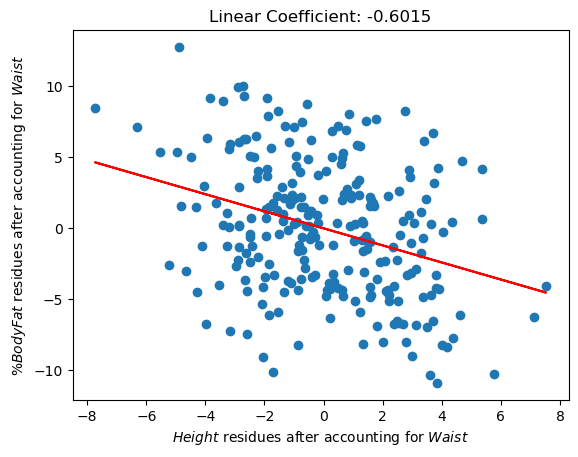

In [16]:
linmod.fit(np.array(bodyfat['Waist']).reshape(-1, 1), y)
fat_residues = y - linmod.predict(np.array(bodyfat['Waist']).reshape(-1, 1))

linmod.fit(np.array(bodyfat['Waist']).reshape(-1, 1), bodyfat['Height'])
height_residues = bodyfat['Height'] - linmod.predict(np.array(bodyfat['Waist']).reshape(-1, 1))

plt.scatter(height_residues, fat_residues)
plt.ylabel('%$BodyFat$ residues after accounting for $Waist$')
plt.xlabel('$Height$ residues after accounting for $Waist$')

linmod.fit(np.array(height_residues).reshape(-1,1), fat_residues)
plt.title(f'Linear Coefficient: {linmod.coef_[0]:.4f}')
plt.plot(height_residues, linmod.predict(np.array(height_residues).reshape(-1,1)), 'r');


**Note**: 

Thus computed linear coefficient is the same as the *Height* coefficient obtained in the above multi-regression.


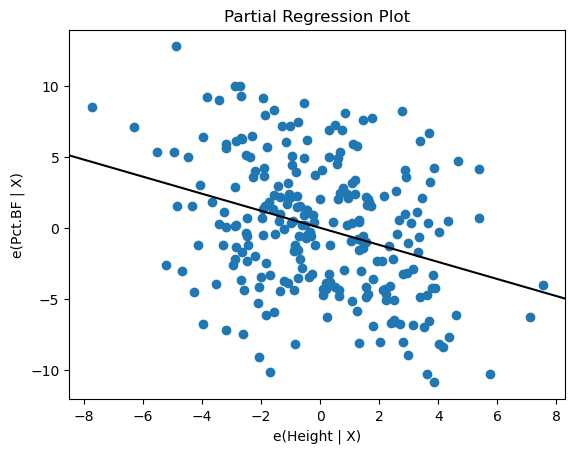

In [17]:
sm.graphics.plot_partregress(y, 'Height', ['Waist'], data=bodyfat,
                             obs_labels=False);

### Multiple Regression: % Body Fat ~ (Waist Size, ...)

In [18]:
bodyfat.columns

Index(['Density', 'Pct.BF', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm',
       'Wrist'],
      dtype='object')

R_squared: 72.3%


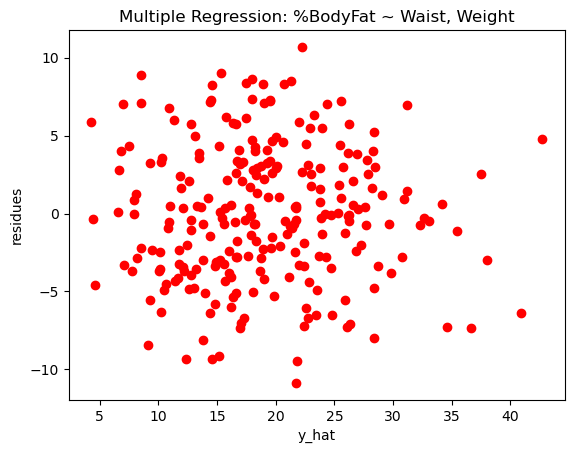

In [19]:
x = bodyfat[['Waist', 'Weight']]
linmod.fit(x, y);
y_hat = linmod.predict(x)
residues = y - y_hat
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')
plt.figure()
plt.scatter(y_hat, residues, color='r');
plt.xlabel('y_hat')
plt.ylabel('residues')
plt.title('Multiple Regression: %BodyFat ~ Waist, Weight');